#Practica 1 (Con el nuevo framework de Images.jl)

##Ejercicio 1

Adquirir 3 imágenes en tonalidades de gris de 2 objetos distintos con iluminación de intensidad baja, media y alta (total: 6 imágenes).


In [67]:
# Imports
import Images, ImageView, Color, FixedPointNumbers, PyPlot, Cartesian

In [68]:
# store the paths of Images
path1 = "../Imagenes/sci-2.bmp";
path2 = "../Imagenes/sci-3.bmp";
path3 = "../Imagenes/sci-4.bmp";
path4 = "../Imagenes/tar-5.bmp";
path5 = "../Imagenes/tar-6.bmp";
path6 = "../Imagenes/tar-7.bmp";

In [69]:
# Read the Images
img1 = Images.imread(path1);
img2 = Images.imread(path2);
img3 = Images.imread(path3);
img4 = Images.imread(path4);
img5 = Images.imread(path5);
img6 = Images.imread(path6);

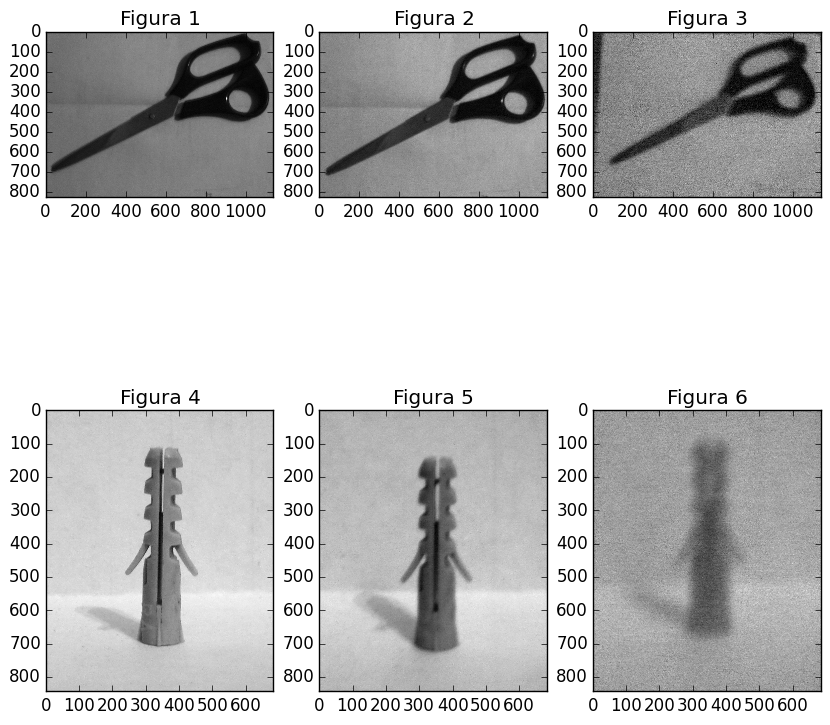

PyObject <matplotlib.image.AxesImage object at 0x7fd4e5d4ad10>

In [70]:
#Plots with Matplotlib ¡¡¡
fig = PyPlot.figure(figsize=(10,10))
#PyPlot.subplots_adjust(hspace=0.5) # Set the vertical spacing between axes

# With the function separate into an array of plain numbers in color-last order(change [x,y] --> [y,x])

PyPlot.subplot(231)
PyPlot.title("Figura 1")
PyPlot.imshow(Images.separate(img1), cmap="gray")

PyPlot.subplot(232)
PyPlot.title("Figura 2")
PyPlot.imshow(Images.separate(img2),cmap="gray")

PyPlot.subplot(233)
PyPlot.title("Figura 3")
PyPlot.imshow(Images.separate(img3),cmap="gray")

PyPlot.subplot(234)
PyPlot.title("Figura 4")
PyPlot.imshow(Images.separate(img4),cmap="gray")

PyPlot.subplot(235)
PyPlot.title("Figura 5")
PyPlot.imshow(Images.separate(img5),cmap="gray")

PyPlot.subplot(236)
PyPlot.title("Figura 6")
PyPlot.imshow(Images.separate(img6),cmap="gray")

## Ejercicio 2

###Mostrar el efecto del ruido producido en una sola imagen que se toma con bajas condiciones de iluminación: Mostrar el efecto en la imagen y realizar un grafico en 2D donde muestre un sector de la imagen de 1 por X pixeles.

Existe un índice que nos indica la proporción señal/ruido presente en la captura de una imágen digital, ese índice se denomina ISO.
En las cámaras digitales, el sensor o CCD2 es el chip encargado de la captura de la imágen. Esta compuesto por una malla de miles de celdas fotosensibles en las que se recibe la imagen formada por el lente.
Cada una de esas celdas genera una corriente el eléctrica en presencia de la luz. Esa corriente eléctrica será luego convertida en datos numéricos que se almacenarán en forma digital binaria en la memoria de la cámara dando origen a un píxel.
Cada una de esas celdas genera una cantidad más o menos fija de corriente eléctrica (y por lo tanto de datos)
al azar, aún en ausencia de la luz y en relación a la temperatura.
La sensibilidad de cada uno de los elementos del sensor es fija, con un valor aproximado equivalente a 100 ISO. Los índices ISO superiores que nos ofrece la cámara digital se logran no por un incremento en la sensibilidad de los elementos captores, sino por una amplificación posterior de la señal que estos emiten. Como estos elementos tienen una emisión de señal de base más o menos fija, al capturar una señal lumínica débil y amplificarla, estamos amplificando también una buena porción de la emisión de datos aleatoria del chip, con lo que se mezclar ́a una cantidad de señal aleatoria sin contenido a la señal correspondiente a la imagen. La mayor calidad de imagen con una cámara digital se obtendrá usándola a su menor sensibilidad ISO equivalente.
El uso de sensibilidades ISO mayores se traducirá en un aumento de pixeles distribuidos al azar, principalmente en las zonas de sombra de la imagen. El ruido, a diferencia del grano, no será proporcional en toda la imagen, sino que se manifestará de forma más evidente en las zonas oscuras.
El ruido es más notable en algunos canales que en otros, normalmente el canal azul suele ser el que contiene más ruido.
Para demostrar esta amplificación de señal aleatoria bajo una señal lumínica débil, tomamos la imágen y
realizamos un corte, para tener referencia de donde se realizó ponemos a continuación la imágen y el corte realizado:

Para mostrar los efectos del ruido presentes bajo baja iluminación, vamos a mostrar en una imagen tomada en esa situacion de iluminación como se ve el ruido presente graficando los valores de una linea de pixels en la imagen.

In [71]:
# load the image taken with low light
path4 = "../Imagenes/sci-4.bmp";

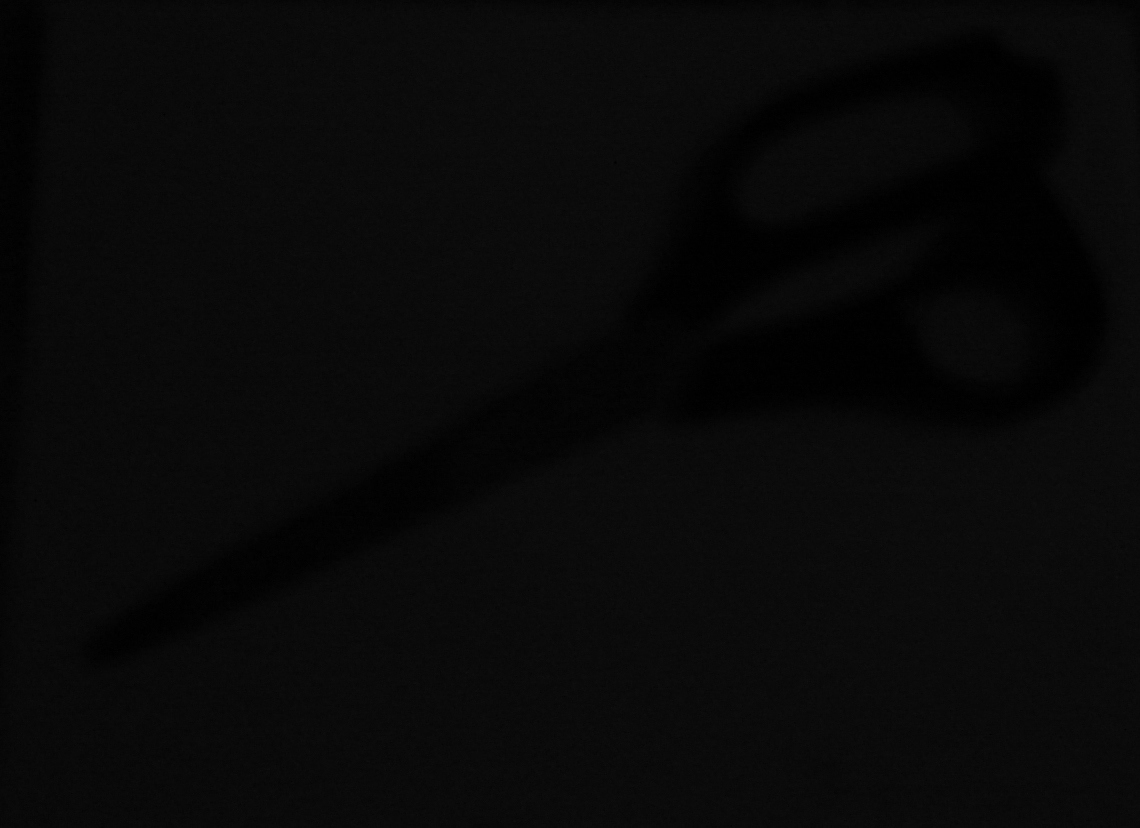

In [72]:
# Read the image
img4 = Images.imread(path4)

In [73]:
img_sep = Images.separate(img4);

In [74]:
# take a line of the image
img_sep_line = img_sep[37,:]';

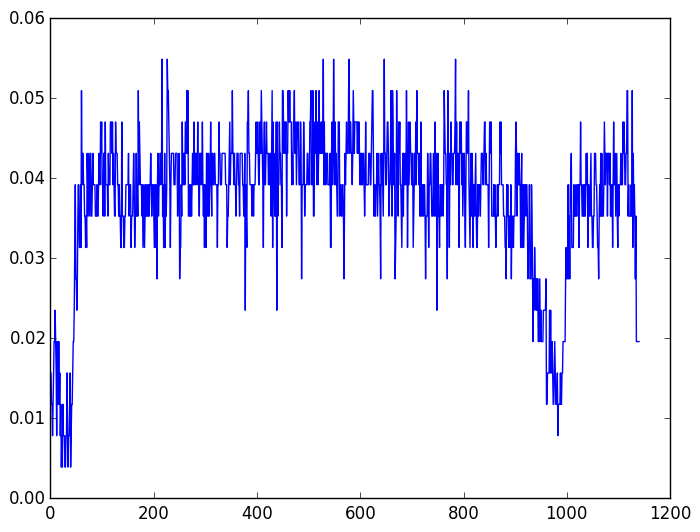

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd4e5b06a90>

In [75]:
PyPlot.plot(img_sep_line)

##Ejercicio 4

###Mostrar el efecto de descomponer una imagen color con el formato bmp en sus tres canales (R,G,B)  y compararla con la original (Se entregarán imágenes de prueba para realizar este punto)

El modelo de color RGB es un modelo aditivo en el cual las representaciones de los colores primarios Red, Green y Blue son sumados de varias maneras para lograr toda la gama de colores. Existe una representación geometrica de este modelo de color:

<img src="../Imagenes/220px-RGB_color_solid_cube.png" style="float: left;"/>
<div style="clear: both;"> 




En Julia(http://julialang.org/) los colores estan representados con un tipo de dato basados en dos Package:

```julia
Array{RGB{UfixedBase{Uint8,8}},2}

```

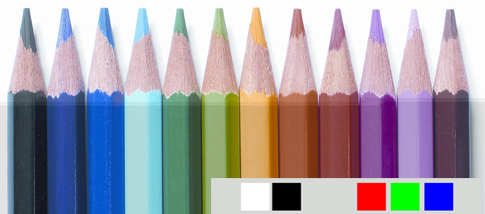

In [76]:
# test image
path1 = "../Imagenes/Lapices.bmp";
img_pens = Images.imread(path1)

Cada pixel esta representado como un elemento RGB(Que en IJulia se visualizan directamente) que a su vez este esta representado por tres números ```FixedPointNumbers{Uint8} ```

In [77]:
color = img_pens[101,137]

##El Package de Julia Image.jl posee una función para extraer los canales directamente, tambien se puede acceder a los canales directamente (ejemplo: img_red = img_arr[:,:,1] .. and so on)


In [78]:
# extract the red channel
img_red = Images.red(img_pens);

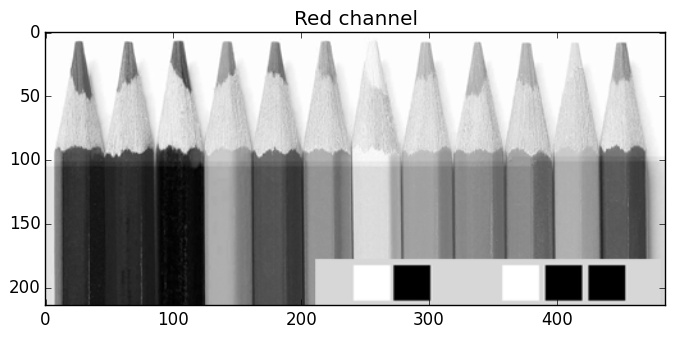

PyObject <matplotlib.text.Text object at 0x7fd4e5a80110>

In [79]:
# The transpose is for pyplot display 
PyPlot.imshow(img_red',cmap="gray")
PyPlot.title("Red channel")

In [80]:
# extract the green channel
img_green = Images.green(img_pens);

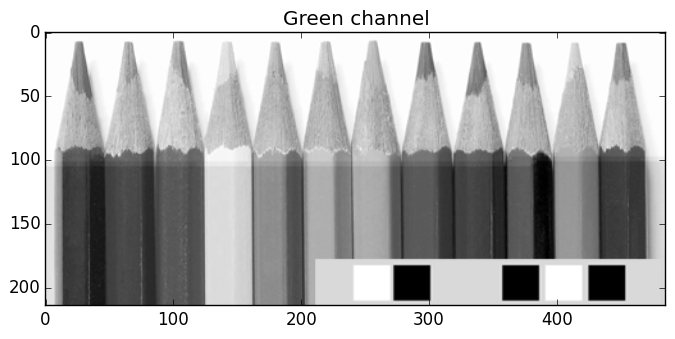

PyObject <matplotlib.text.Text object at 0x7fd4e5a2d750>

In [81]:
PyPlot.imshow(img_green',cmap="gray")
PyPlot.title("Green channel")

In [82]:
# extract the blue channel
img_blue = Images.blue(img_pens);

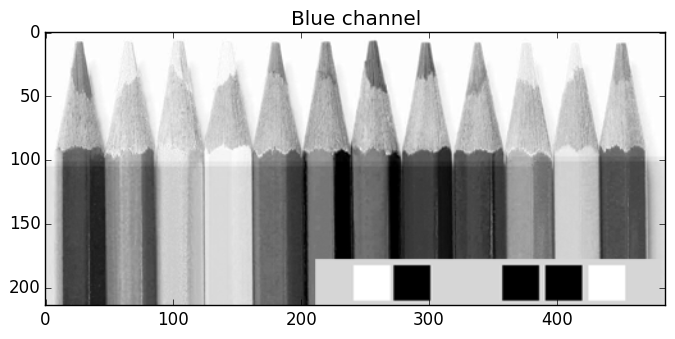

PyObject <matplotlib.text.Text object at 0x7fd4e595dd90>

In [83]:
PyPlot.imshow(img_blue',cmap="gray")
PyPlot.title("Blue channel")

#Ejercicio 5
###Mostrar los efectos del muestreo y la cuantización en una imagen dada.

Las imágenes digitales en escala de grises son representadas por matrices en las cuales sus elementos son 
las intensidades de los píxeles en las coordenada $[x;y]$ se representa por ello a una imágen de (N por M)
 píxeles como una función
$f[x;y]$ ,el proceso de obtención de esta imágen proviene de haber muestreado una imágen continua $f(x;y)$ con 
un período de muestreo (si el muestreo es uniforme) $T$ . 



$$
\begin{equation}
f[x;y]=
\begin{bmatrix}
 f[0;0] & f[0;1] & ...&f[0,N-1] \\
 : & : & : \\
 : & : & : \\
 f[M-1;0] & f[M-1;1] & ...&f[M-1;N-1]
\end{bmatrix}
\end{equation}
$$
 Si realizamos nuevamente el proceso de muestrear la señal
digital, lo que estaremos haciendo es simplemente reduciendo su tamaño ya que al muestrear nuevamente tomamos
 una muestra si otra no , una si otra no de la imagen original (si $T=2$)
 $$
\begin{equation}
f_{s}[x;y]=
\begin{bmatrix}
 f[0;0] & f[0;3] & ...&f[0,N-3] \\
 : & : & : \\
 : & : & : \\
 f[M-3;0] & f[M-3;3] & ...&f[M-3;N-3]
\end{bmatrix}
\end{equation}
$$

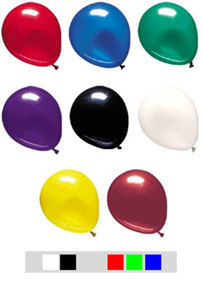

In [84]:
path1 = "../Imagenes/Globos.bmp";
img = Images.imread(path1)

In [85]:
img_sep = Images.separate(img)
size(img_sep)

(286,202,3)

In [86]:
# Slicing and subsampling
img_sep_sub = zeros(size(img_sep)) # prealocate 
img_sep_sub[1:4:end,1:4:end] = img_sep[1:4:end,1:4:end];

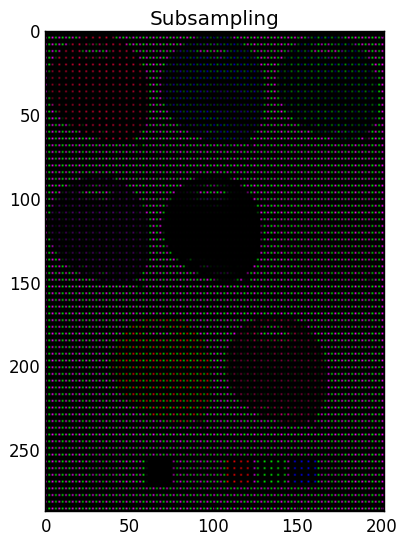

PyObject <matplotlib.text.Text object at 0x7fd4e58ca450>

In [87]:
PyPlot.imshow(img_sep_sub',cmap="gray")
PyPlot.title("Subsampling")

El efecto visible que se nota al realizar un submuestreo es el de píxelamiento de la imagen ya que hemos sacado
información de la misma.

La cuantización de una imagen digital, se trata simplemente de cuantizar los niveles en que están representadas
en las intensidades de los píxeles, la mayoría de las imágenes están representadas en 8 bits.

In [88]:
#cuantizacion
niveles = 4
I_cuant = floor(img_sep)*(1/niveles);

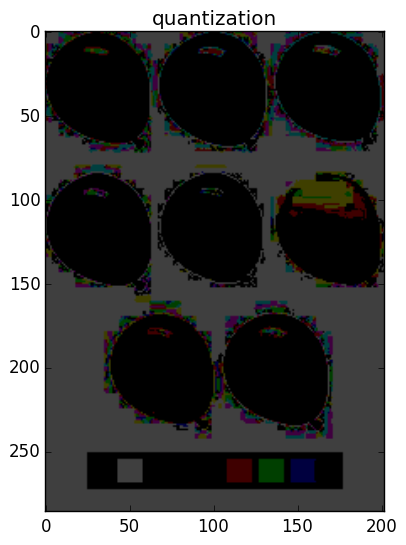

PyObject <matplotlib.text.Text object at 0x7fd4e5860cd0>

In [89]:
PyPlot.imshow(I_cuant',cmap="gray")
PyPlot.title("quantization")

##Ejercicio 6-7

### Desarrollar una función que permita calcular el histograma de una imagen en tonos de gris y lo muestre en pantalla. 
###Aplicar la función a las imágenes del punto 1.

##Histogramas

El histograma de una imagen con $L$ niveles posibles de intensidad de pixeles en el rango $[0,G]$ es definido como una función discreta:

$$h(r_{k})=n_{k}$$

Donde: $r_{k}$ es el $k$-esimo nivel de intesidad en el intervalo $[0,G]$ y $n_{k}$ es el número de pixeles en la imagen cuyo nivel de intesidad es $r_{k}$

Primera aproximación con element-wise y un solo bucle.

In [90]:
function histogram(img)
    vals = linspace(FixedPointNumbers.Ufixed8(0),FixedPointNumbers.Ufixed8(1),256)
    h = Array(Float64,256) # prealocate a Int array
    m,n = size(img)
    num_pix = m*n
    for i = 1:length(vals)
        h[i] = length(find(img .== vals[i]))
    end
    return h ./ num_pix # normalization
end

histogram (generic function with 1 method)

Segunda aproximacion: Con tres bucles y comprobando elemento a elemento(es más rápida)

In [91]:
function histogram2(img)
    vals = linspace(FixedPointNumbers.Ufixed8(0),FixedPointNumbers.Ufixed8(1),256)
    h = Array(Float64,256)
    m,n = size(img)
    N = m * n
    for l = 1:length(vals)
        count = 0.0
        for i = 1:m
            for j = 1:n
                if(img[i,j] == vals[l])
                    count += 1
                end
                h[l] = count
            end
        end
    end
    return h ./ N
end

histogram2 (generic function with 1 method)

Tercera aproximación: Usando macros de Cartesian para los bucles anidados

In [92]:
using Cartesian

In [93]:
function histogram3(img)
    vals = linspace(FixedPointNumbers.Ufixed8(0),FixedPointNumbers.Ufixed8(1),256)
    h = Array(Float64,256)
    m,n = size(img)
    N = m * n
    for l = 1:length(vals)
        counter = 0.0
        @nloops 2 i img begin
            if((@nref 2 img i) == vals[l])
                counter += 1
            end
            h[l] = counter
        end
    end
    return h ./ N
end

histogram3 (generic function with 1 method)

In [94]:
# Load the images of the exercice 1
path1 = "../Imagenes/sci-2.bmp";
path2 = "../Imagenes/sci-3.bmp";
path3 = "../Imagenes/sci-4.bmp";
path4 = "../Imagenes/tar-5.bmp";
path5 = "../Imagenes/tar-6.bmp";
path6 = "../Imagenes/tar-7.bmp";

img1 = Images.imread(path1);
img2 = Images.imread(path2);
img3 = Images.imread(path3);
img4 = Images.imread(path4);
img5 = Images.imread(path5);
img6 = Images.imread(path6);

img_gray1 = convert(Array{Images.Gray},img1);
img_gray2 = convert(Array{Images.Gray},img2);
img_gray3 = convert(Array{Images.Gray},img3);
img_gray4 = convert(Array{Images.Gray},img4);
img_gray5 = convert(Array{Images.Gray},img5);
img_gray6 = convert(Array{Images.Gray},img6);



Vamos a comparar los tiempos de procesamiento de cada función:

In [95]:
@time histogram(img_gray1)

elapsed time: 1.299326415 seconds (39194620 bytes allocated, 14.62% gc time)


256-element Array{Float64,1}:
 6.35647e-6 
 3.39012e-5 
 0.000377151
 0.00184444 
 0.00613399 
 0.0127574  
 0.0185408  
 0.0168722  
 0.0105528  
 0.00731524 
 0.00550576 
 0.00436901 
 0.00398551 
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

In [96]:
@time histogram2(img_gray1)

elapsed time: 1.107637689 seconds (455428 bytes allocated)


256-element Array{Float64,1}:
 6.35647e-6 
 3.39012e-5 
 0.000377151
 0.00184444 
 0.00613399 
 0.0127574  
 0.0185408  
 0.0168722  
 0.0105528  
 0.00731524 
 0.00550576 
 0.00436901 
 0.00398551 
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

In [97]:
@time histogram3(img_gray1)

elapsed time: 0.71092374 seconds (486868 bytes allocated)


256-element Array{Float64,1}:
 6.35647e-6 
 3.39012e-5 
 0.000377151
 0.00184444 
 0.00613399 
 0.0127574  
 0.0185408  
 0.0168722  
 0.0105528  
 0.00731524 
 0.00550576 
 0.00436901 
 0.00398551 
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

In [98]:
h1 = histogram(img_gray1);
h2 = histogram(img_gray2);
h3 = histogram(img_gray3);
h4 = histogram(img_gray4);
h5 = histogram(img_gray5);
h6 = histogram(img_gray6);

In [99]:
# verificacion
sum(h2)

1.0

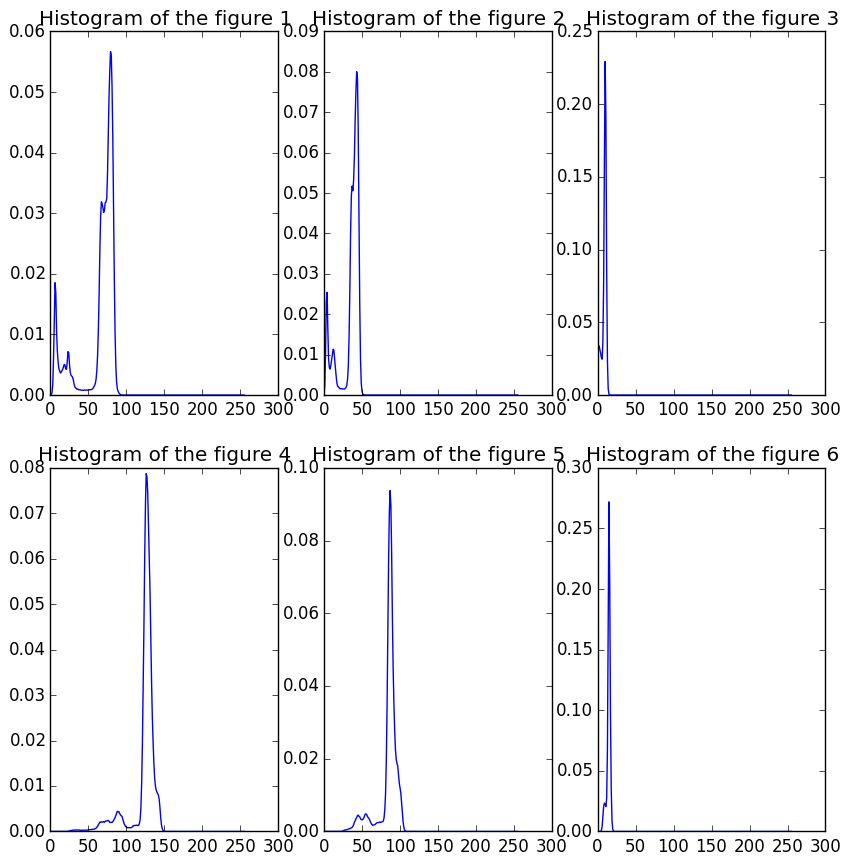

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd4e54caa50>

In [100]:
#Plots with Matplotlib ¡¡¡
fig = PyPlot.figure(figsize=(10,10))
#PyPlot.subplots_adjust(hspace=0.5) # Set the vertical spacing between axes



PyPlot.subplot(231)
PyPlot.title("Histogram of the figure 1")
PyPlot.plot(h1)

PyPlot.subplot(232)
PyPlot.title("Histogram of the figure 2")
PyPlot.plot(h2)

PyPlot.subplot(233)
PyPlot.title("Histogram of the figure 3")
PyPlot.plot(h3)

PyPlot.subplot(234)
PyPlot.title("Histogram of the figure 4")
PyPlot.plot(h4)

PyPlot.subplot(235)
PyPlot.title("Histogram of the figure 5")
PyPlot.plot(h5)

PyPlot.subplot(236)
PyPlot.title("Histogram of the figure 6")
PyPlot.plot(h6)

##Ejercicio 8 
###Hallar un valor de segmentación óptimo (en forma manual o automática) para cada una de las imágenes tomadas en el punto 1 (6 imágenes). Mostrar los resultados.

Supongamos un histograma como el de la figura siguiente, que corresponde a una imagen $f(x,y)$ compuesta por objetos iluminados sobre un fondo oscuro, de esta manera los pixeles de los objetos y del fondo se agrupan en dos modos bien diferenciados, una de las maneras más sencillas de extraer el fondo de los objetos es seleccionar un umbral $T$ que separa estos dos modos. Entonces cualquier punto $(x,y)$ para el cual $f(x,y) \geq T$ es llamado un punto del objeto, en otro caso es llamado punto de fondo. En otras palabras, la imagen umbralizada $g(x,y)$ es definida como:

$$
g(x,y)=
\left\{\begin{array}{lcc}
1 &   si  & f(x,y) \geq T \\
0 &  si & f(x,y) < T  
\end{array}
\right.
$$

Para elegir un umbral automáticamente, Gonzalez y Goods[2002] proponen el siguiente algoritmo iterativo:

* Elegir una estimación inicial de $T$(Como sugerencia: el punto medio entre el minimo y el máximo valor de intensidad de la imagen)

* Segmentar la imagen usando $T$. Esto producirá dos grupos de pixels: $G_{1}$ que son todos los pixeles que tienen intensidades $\geq T$ y $G_{2}$ que son los pixels cuyos valores $< T$

* Calcular el promedio de las instensidades en $G_{1}$ y $G_{2}$ que seran respectivamente: $\mu_{1}$ y $\mu_{2}$ 

* Calcular un nuevo valor de umbral :
$$T = \frac{1}{2}(\mu_{1}+\mu_{2})$$

* Repetir el paso 2 hasta 4 mientras la diferencia entre $T$ y las sucesivas iteraciones sean mayores a un valor predefinido $T_{0}$

In [101]:
function segment_Gonz(img_gray)
    T = 0.5 * (minimum(img_gray) + maximum(img_gray)) 
    flag = false
    while ~flag
        g = img_gray .< T
        T_next = 0.5 * (mean(img_gray[g]) + mean(img_gray[~g]) )
        flag = abs(T - T_next) < 0.5
        T = T_next
    end
    return T
end

segment_Gonz (generic function with 1 method)

In [102]:
# Find the thresold
T1 = segment_Gonz(img_gray1);
T2 = segment_Gonz(img_gray2);
T3 = segment_Gonz(img_gray3);
T4 = segment_Gonz(img_gray4);
T5 = segment_Gonz(img_gray5);
T6 = segment_Gonz(img_gray6);
#Thresh the images
g1 = img_gray1 .< T1 ; 
g2 = img_gray2 .< T2 ; 
g3 = img_gray3 .< T3 ; 
g4 = img_gray4 .< T4 ; 
g5 = img_gray5 .< T5 ; 
g6 = img_gray6 .< T6 ; 

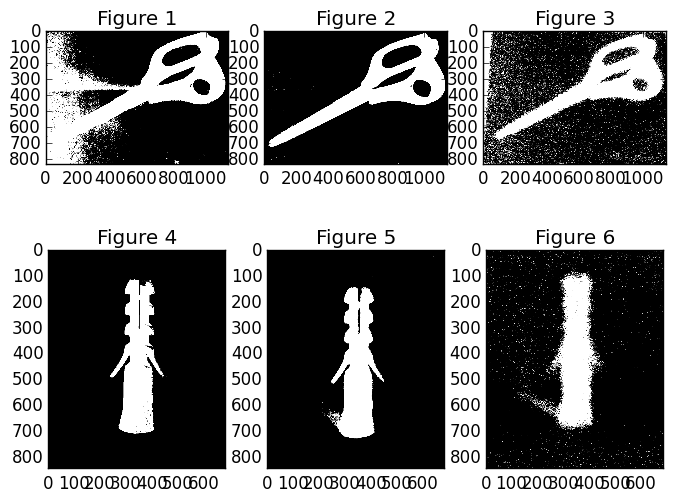

PyObject <matplotlib.image.AxesImage object at 0x7fd4df262cd0>

In [103]:
PyPlot.subplot(231)
PyPlot.title("Figure 1")
PyPlot.imshow(g1, cmap="gray")

PyPlot.subplot(232)
PyPlot.title("Figure 2")
PyPlot.imshow(g2, cmap="gray")

PyPlot.subplot(233)
PyPlot.title("Figure 3")
PyPlot.imshow(g3, cmap="gray")

PyPlot.subplot(234)
PyPlot.title("Figure 4")
PyPlot.imshow(g4, cmap="gray")

PyPlot.subplot(235)
PyPlot.title("Figure 5")
PyPlot.imshow(g5, cmap="gray")

PyPlot.subplot(236)
PyPlot.title("Figure 6")
PyPlot.imshow(g6, cmap="gray")